# 랜덤포레스트의 하이퍼 파라미터
- 트리 기반의 앙상블 알고리즘의 단점: 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모된다는 점  
$\rightarrow$ 많은 시간을 투자하여도 예측성능이 크게 향상되지도 않음
- 랜덤포레스트의 경우 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분
![image](https://user-images.githubusercontent.com/70187490/130909378-e9e95357-80b4-475e-9e4c-a381b921544c.png)


In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
    
import matplotlib.pyplot as plt
import numpy as np
    
iris = load_iris()
rf_clf = RandomForestClassifier(random_state=156)
X_train, X_test, y_train, y_test  = train_test_split(iris.data, iris.target, 
                                                     test_size= 0.2, random_state= 156)

In [2]:
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)

print(conf_mat)
accuracy_score(pred, y_test)

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]


1.0

In [3]:
def visualize_boundary(estimator, X, y, columns, title=None):

    estimator.fit(X, y)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k', s=20, zorder=3)
    ax.axis('tight')
    
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    xx, yy = np.meshgrid( np.arange(xlim_start, xlim_end, 0.02),
                          np.arange(ylim_start, ylim_end, 0.02) )
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.5, 
                levels=np.arange(len(np.unique(y)) + 1)- 0.5,
                cmap='rainbow');
    
    plt.xlabel(iris.feature_names[columns[0]], fontsize=16)
    plt.ylabel(iris.feature_names[columns[1]], fontsize=16);
    
    if title==None:
        pass
    else:
        plt.title(str(title), fontsize=16)

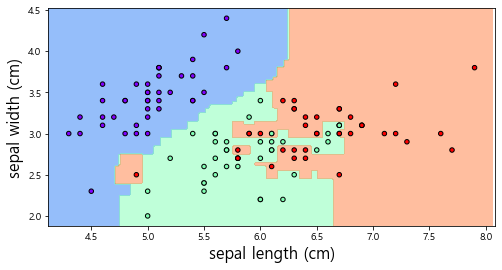

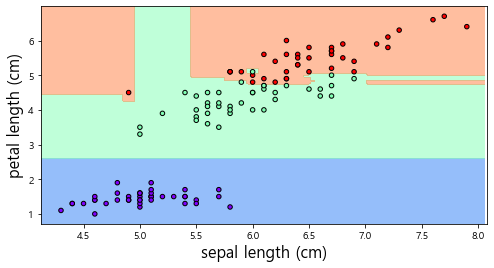

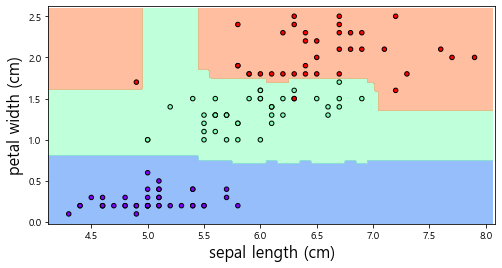

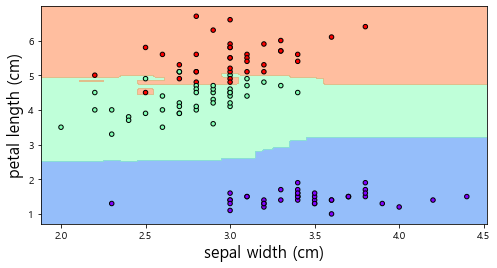

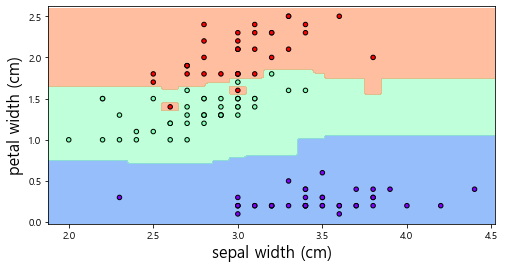

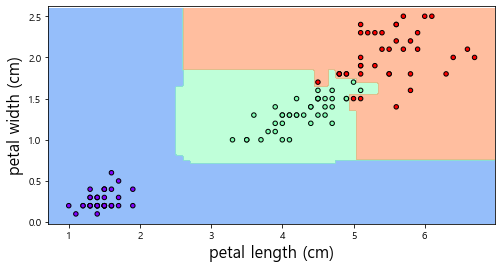

In [4]:
for i in  [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]:
    visualize_boundary(rf_clf, X_train[:,i], y_train, i)

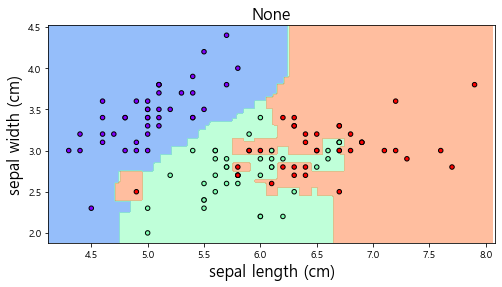

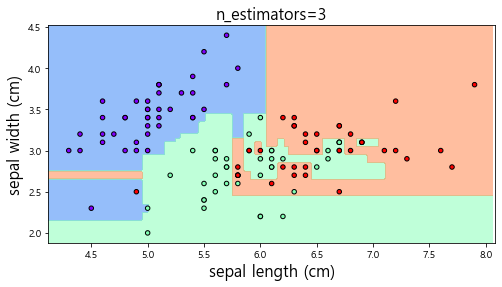

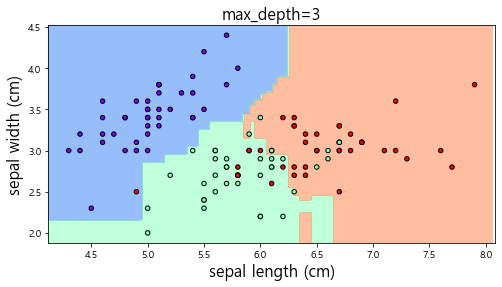

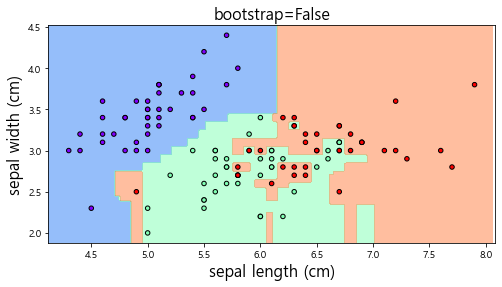

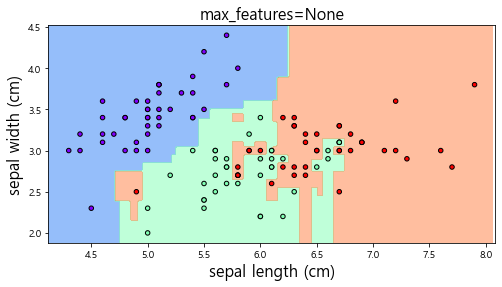

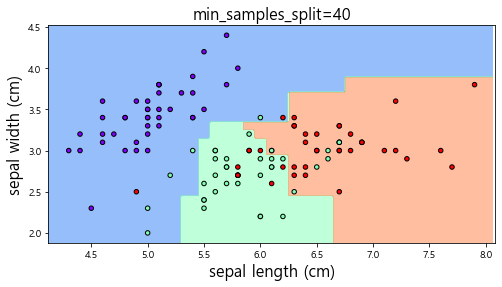

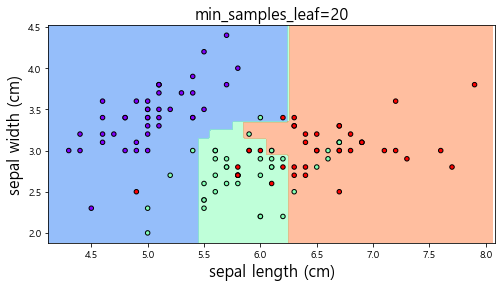

In [5]:
rf_clf=RandomForestClassifier(random_state=156)
visualize_boundary(rf_clf, X_train[:,[0,1]], y_train,[0,1], title='None')

# 학습기의 갯수를 규정
rf_clf=RandomForestClassifier(n_estimators=3, random_state=156)
visualize_boundary(rf_clf, X_train[:,[0,1]], y_train,[0,1], title='n_estimators=3')

# 각 학습기 마다의 최대 깊이를 규정
rf_clf=RandomForestClassifier(max_depth=3, random_state=156)
visualize_boundary(rf_clf, X_train[:,[0,1]], y_train,[0,1], title='max_depth=3')

# 부트스트랩(복원추출)을 하지 않음
rf_clf=RandomForestClassifier(bootstrap=False, random_state=156)
visualize_boundary(rf_clf, X_train[:,[0,1]], y_train,[0,1], title='bootstrap=False')

# feature를 뽑는 기준을 전체로 모든 feature로 규정
rf_clf=RandomForestClassifier(max_features=None, random_state=156)
visualize_boundary(rf_clf, X_train[:,[0,1]], y_train,[0,1], title='max_features=None')

# 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 수의 제한
rf_clf=RandomForestClassifier(min_samples_split=40, random_state=156)
visualize_boundary(rf_clf, X_train[:,[0,1]], y_train,[0,1], title='min_samples_split=40')

# 말단 노드가 되기 위한 최소한의 샘플 수
rf_clf=RandomForestClassifier(min_samples_leaf=20, random_state=156)
visualize_boundary(rf_clf, X_train[:,[0,1]], y_train,[0,1], title='min_samples_leaf=20')

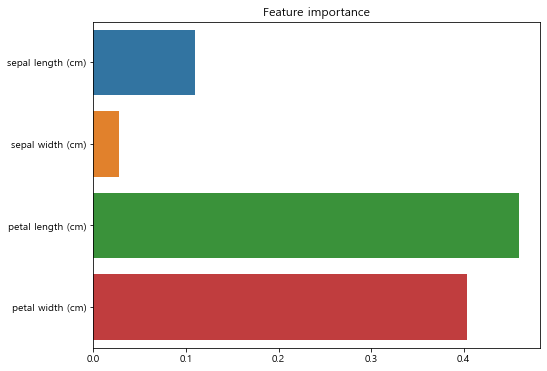

In [6]:
import pandas as pd
import seaborn as sns

rf_clf=RandomForestClassifier(random_state=156)
rf_clf.fit(X_train, y_train)

rf_importance_values = rf_clf.feature_importances_
rf_importance = pd.Series(rf_importance_values, index=iris.feature_names)

plt.figure(figsize=(8, 6))
plt.title('Feature importance')
sns.barplot(x=rf_importance, y=rf_importance.index);

# 랜덤포레스트 하이퍼파라미터 튜닝

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[80, 90, 100, 120],
    'max_depth':[1, 2, 3, 5, 10, None],
    'min_samples_leaf':[1, 2, 3, 4, 5]
}

rf_clf = RandomForestClassifier(random_state=156, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 80}
최고 예측 정확도: 0.9500


In [8]:
param_df = pd.DataFrame(grid_cv.cv_results_).sort_values(by='mean_test_score', ascending=False)
param_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.217097,0.022924,0.049032,0.010422,2,2,90,"{'max_depth': 2, 'min_samples_leaf': 2, 'n_est...",0.875,0.958333,0.958333,1.0,0.958333,0.95,0.040825,1
21,0.252457,0.035951,0.035609,0.006501,2,1,90,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.875,0.958333,0.958333,1.0,0.958333,0.95,0.040825,1
20,0.216250,0.025932,0.037208,0.003061,2,1,80,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.875,0.958333,0.958333,1.0,0.958333,0.95,0.040825,1
28,0.215611,0.024761,0.052812,0.011056,2,3,80,"{'max_depth': 2, 'min_samples_leaf': 3, 'n_est...",0.875,0.958333,0.958333,1.0,0.958333,0.95,0.040825,1
29,0.228098,0.015630,0.043002,0.011973,2,3,90,"{'max_depth': 2, 'min_samples_leaf': 3, 'n_est...",0.875,0.958333,0.958333,1.0,0.958333,0.95,0.040825,1
